In [1]:
import pandas as pd

# Read the two datasets
reviews_by_course_df = pd.read_csv('reviews_by_course.csv')
reviews_df = pd.read_csv('reviews.csv')



In [2]:
rbc_df = reviews_by_course_df.sample(n=10000, random_state=1)
r_df = reviews_df.sample(n=17000, random_state=1)

In [3]:
rbc_df.head()

,CourseId,Review,Label
8332,art-activity,"Very good, complete and interesting course ;) ...",5
77473,machine-learning,"Very well made, well paced. Better than majori...",4
2545,algebra-basica,me gusta muchísimo este curso,5
25430,data-structures-optimizing-performance,"Great Material, and great teachers!",5
48201,happiness,It really boost the happiness level in life an...,4


In [4]:
r_df.head()

,Id,Review,Label
14513,14513,very basic.,1
102443,102443,This course has been a learning process that h...,5
58601,58601,very good course,5
46608,46608,"Amazing! Full of useful info, tips, and tricks...",5
86143,86143,Great introduction to the topic. Great teacher...,4


In [5]:
merged_df = rbc_df.merge(r_df, on='Label')

In [26]:
merged_df.head()

,CourseId,Review_x,Label,Id,Review_y
0,art-activity,"Very good, complete and interesting course ;) ...",5,102443,This course has been a learning process that h...
1,art-activity,"Very good, complete and interesting course ;) ...",5,58601,very good course
2,art-activity,"Very good, complete and interesting course ;) ...",5,46608,"Amazing! Full of useful info, tips, and tricks..."
3,art-activity,"Very good, complete and interesting course ;) ...",5,54722,"Amazing and free machine learning course, grea..."
4,art-activity,"Very good, complete and interesting course ;) ...",5,28154,"Good content, it explains with so much clear a..."


# EDA

In [27]:
reviews_by_course_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140320 entries, 0 to 140319
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   CourseId  140320 non-null  object
 1   Review    140317 non-null  object
 2   Label     140320 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.2+ MB


In [28]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107018 entries, 0 to 107017
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Id      107018 non-null  int64 
 1   Review  107018 non-null  object
 2   Label   107018 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ MB


In [14]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100901180 entries, 0 to 100901179
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   CourseId  object
 1   Review_x  object
 2   Label     int64 
 3   Id        int64 
 4   Review_y  object
dtypes: int64(2), object(3)
memory usage: 4.5+ GB


There are 1835 unique courses in the dataset.

In [21]:
# unique course ID
len(reviews_by_course_df["CourseId"].unique())

1835

Let's find courses with the highest number of reviews/ratings for the course.
And print top20.

In [20]:
# find most popular courses
reviews_number = reviews_by_course_df["CourseId"].value_counts()
# show top20 courses by the reviews number
print(reviews_number[:20])

machine-learning                          8570
learning-how-to-learn                     7090
python                                    5906
python-data                               2372
python-network-data                       1844
data-scientists-tools                     1637
html-css-javascript                       1544
r-programming                             1292
grammar-punctuation                       1267
ml-foundations                            1247
html-css-javascript-for-web-developers    1122
childnutrition                            1117
html                                      1101
food-and-health                            990
python-databases                           940
calculus1                                  899
negotiation-skills                         835
web-frameworks                             832
happiness                                  805
work-smarter-not-harder                    768
Name: CourseId, dtype: int64


Not surprising that Machine Learning by Andrew Ng has the most ratings. Perhaps, it is one of the best courses on Coursera!
Let's see how ahead of other top20 courses it is.

[Text(0.5, 0, 'number of ratings'), Text(0, 0.5, 'Course ID')]

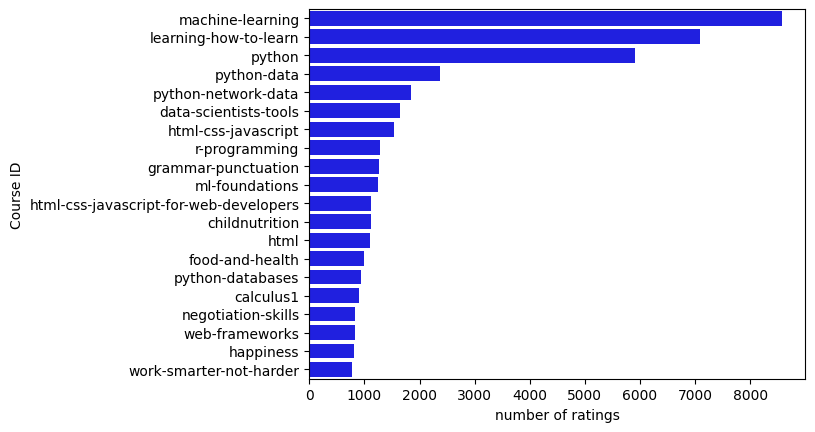

In [23]:
# plot barplot
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(y=reviews_number[:20].index, x=reviews_number[:20],color="b").set(xlabel="number of ratings", ylabel="Course ID")

Time to find average ratings of the courses.

C:\Users\Soham Tolwala\AppData\Local\Temp\ipykernel_8436\4206460610.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_rating = reviews_by_course_df.groupby("CourseId").mean().sort_values("Label", ascending=False)
C:\Users\Soham Tolwala\AppData\Local\Temp\ipykernel_8436\4206460610.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(average_rating, kde=False).set(xlabel="average rating", ylabel="number of courses")


[Text(0.5, 0, 'average rating'), Text(0, 0.5, 'number of courses')]

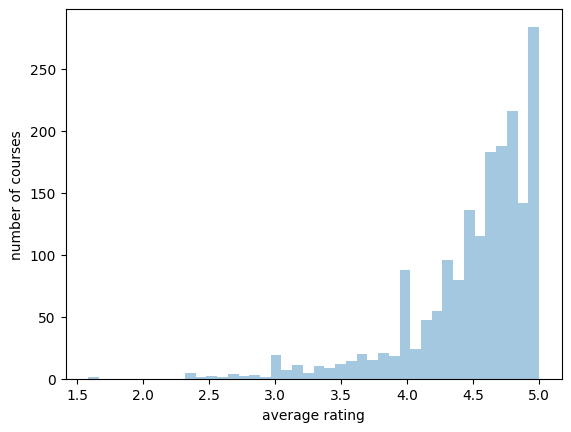

In [25]:
# average rating of the course
average_rating = reviews_by_course_df.groupby("CourseId").mean().sort_values("Label", ascending=False)
# plot histogram
sns.distplot(average_rating, kde=False).set(xlabel="average rating", ylabel="number of courses")

In [30]:
# number of courses with average rating 5.0
av_rating_5 = int(average_rating[average_rating.Label==5.0].count())
print("Number of courses with average rating 5.0:")
print(av_rating_5)
print("% of the total number of courses:")
print(av_rating_5/len(reviews_by_course_df["CourseId"].unique())*100)

Number of courses with average rating 5.0:
239
% of the total number of courses:
13.024523160762943


In [31]:
# extract review numbers for courses with average rating 5.0
df_av_rating_5 = pd.DataFrame(reviews_number)[average_rating.Label==5.0]
# explore statistics
print(df_av_rating_5.describe())

         CourseId
count  239.000000
mean     3.874477
std      3.909821
min      1.000000
25%      1.000000
50%      3.000000
75%      5.000000
max     32.000000


C:\Users\Soham Tolwala\AppData\Local\Temp\ipykernel_8436\4220655541.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_av_rating_5 = pd.DataFrame(reviews_number)[average_rating.Label==5.0]


Let's turn to reviews and find the average number of characters in the review.

count    1835.000000
mean      138.469118
std        94.903274
min         3.500000
25%        94.138889
50%       127.505882
75%       165.911585
max      2076.000000
Name: Review_len, dtype: float64


C:\Users\Soham Tolwala\AppData\Local\Temp\ipykernel_8436\2852665884.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_len = reviews_by_course_df.groupby("CourseId").mean().sort_values("Review_len", ascending=False)
C:\Users\Soham Tolwala\AppData\Local\Temp\ipykernel_8436\2852665884.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(average_len["Review_len"], kde=False).set(xlabel="average number of characters in review", ylabel="number of c

[Text(0.5, 0, 'average number of characters in review'),
 Text(0, 0.5, 'number of courses')]

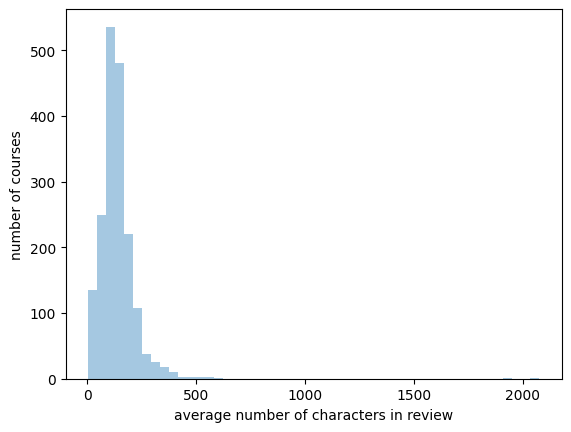

In [34]:
# compute the number of characters in the review
reviews_by_course_df["Review_len"] = reviews_by_course_df["Review"].str.len()
# compute the average number of characters in the review for every course
average_len = reviews_by_course_df.groupby("CourseId").mean().sort_values("Review_len", ascending=False)
# explore statistics
print(average_len.Review_len.describe())
#plot histogram
sns.distplot(average_len["Review_len"], kde=False).set(xlabel="average number of characters in review", ylabel="number of courses",)

Put number of reviews, average rating and average length of the review together in one DataFrame

In [35]:
# Merge datasets on index and create new DataFrame "analysis"
# first we will transform most_reviews from Series to DataFrame
df_reviews_number = pd.DataFrame(reviews_number)
# merge df_reviews_number and average_rating
analysis = pd.merge(df_reviews_number, average_rating,  right_index=True, left_index=True)
# transform average_len from Series to DataFrame
df_average_len = pd.DataFrame(average_len.Review_len)
# merge analysis and df_average_len
analysis = pd.merge(analysis, df_average_len,  right_index=True, left_index=True)
# rename columns
analysis.columns = ["reviews_number", "av_rating", "av_review_len"]
# show first 5 rows
analysis.head()

,reviews_number,av_rating,av_review_len
machine-learning,8570,4.899067,129.918436
learning-how-to-learn,7090,4.858392,133.896333
python,5906,4.778869,102.380799
python-data,2372,4.836425,88.512226
python-network-data,1844,4.767896,100.733731


In [36]:
# Let's first explore correlations 
analysis.corr()

,reviews_number,av_rating,av_review_len
reviews_number,1.000000,0.054449,-0.023933
av_rating,0.054449,1.000000,-0.252136
av_review_len,-0.023933,-0.252136,1.000000


[(0.0, 500.0),
 Text(0.5, 0, 'average number of characters in review'),
 Text(0, 0.5, 'average rating')]

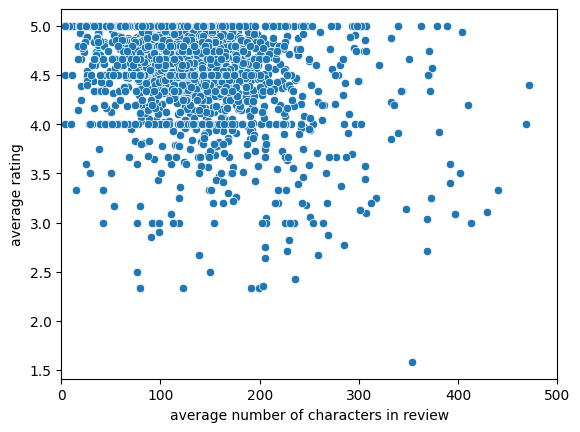

In [37]:
# plot scatter plot with av_review_len as x and av_rating as y
sns.scatterplot(x="av_review_len", y="av_rating", data = analysis).set(xlim=(0,500), xlabel="average number of characters in review", ylabel="average rating")

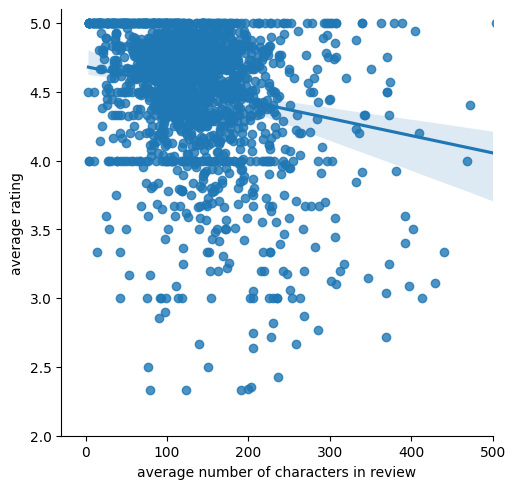

In [38]:
# Show scatter plot with linear model
sns.lmplot(x="av_review_len", y="av_rating", data = analysis).set(xlim=(-30, 500), ylim=(2,5.1), xlabel="average number of characters in review", ylabel="average rating")

In [7]:
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors


# Create a pivot table to transform the data into a user-item matrix
user_item_matrix = pd.pivot_table(merged_df, values='Label', index='Id', columns='CourseId')

# Fill any missing values with 0
user_item_matrix = user_item_matrix.fillna(0)

# Convert the user-item matrix to a sparse matrix to save memory
sparse_matrix = csr_matrix(user_item_matrix.values)

# Fit a NearestNeighbors model on the sparse matrix to find similar users
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(sparse_matrix)


NearestNeighbors(algorithm='brute', metric='cosine')

In [9]:
merged_df.Id

0            102443
1             58601
2             46608
3             54722
4             28154
              ...  
100901175     68309
100901176    104767
100901177     82756
100901178     33425
100901179     19246
Name: Id, Length: 100901180, dtype: int64

### User based filtering

In [10]:


# create a pivot table with user_id, course_id, and rating
pivot_table = pd.pivot_table(
    merged_df,
    values='Label',
    index='Id',
    columns='CourseId',
    fill_value=0
)

# print the pivot table
print(pivot_table)


CourseId  2-speed-it  2d-cad  3d-cad  3d-printing  3d-printing-applications  \
Id                                                                            
1                  5       5       5            5                         5   
4                  4       0       0            0                         0   
6                  5       5       5            5                         5   
8                  5       5       5            5                         5   
10                 5       5       5            5                         5   
...              ...     ...     ...          ...                       ...   
106981             5       5       5            5                         5   
107006             5       5       5            5                         5   
107009             5       5       5            5                         5   
107012             5       5       5            5                         5   
107013             4       0       0            0   

In [11]:


import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity


# create a pivot table for users and courses
user_course = pd.pivot_table(merged_df, values='Label', index='Id', columns='CourseId')

# fill the missing values with 0
user_course = user_course.fillna(0)

# create a matrix with user vs user similarity score
user_user_sim_matrix = cosine_similarity(user_course)

# convert the matrix into a DataFrame
user_user_sim_df = pd.DataFrame(user_user_sim_matrix, index=user_course.index, columns=user_course.index)

# recommend courses for a given user
def recommend_courses_user(user_id, num_of_courses):
    # get the user-user similarity score for the given user_id
    user_similarity_scores = user_user_sim_df[user_id]

    # sort the users based on the similarity score
    sorted_users = user_similarity_scores.sort_values(ascending=False)

    # select the top 5 similar users
    top_users = sorted_users.iloc[1:6].index

    # select the courses taken by the top 5 similar users
    courses_taken_by_top_users = user_course.loc[top_users]

    # calculate the mean rating of each course taken by the top 5 similar users
    mean_rating = courses_taken_by_top_users.mean(axis=0)

    # select the courses that the given user has not taken
    courses_not_taken = user_course.loc[user_id] == 0

    # select the mean rating of the courses that the given user has not taken
    recommended_courses = mean_rating[courses_not_taken]

    # sort the courses based on the mean rating and recommend the top n courses
    recommended_courses = recommended_courses.sort_values(ascending=False).head(num_of_courses)

    return recommended_courses.index.tolist()

# recommend 5 courses for user ID 1
recommendations = recommend_courses_user(1, 5)

print("Recommended Courses for User ID 1:")
print(recommendations)


Recommended Courses for User ID 1:
['aboriginal-education', 'performance-assessment', 'orden', 'ordenamiento-datos', 'organic-chemistry']


### Item based filtering

In [12]:
from sklearn.metrics.pairwise import cosine_similarity

# create item-user matrix
item_user_matrix = merged_df.pivot_table(index='CourseId', columns='Id', values='Label').fillna(0)

# calculate item-item similarity
item_sim_matrix = cosine_similarity(item_user_matrix.T)

# function to get similar courses
def get_similar_courses(course_id, n):
    sim_scores = list(enumerate(item_sim_matrix[course_id]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_n_courses = [i for i, score in sim_scores if i != course_id][:n]
    return top_n_courses

# get similar courses to '2-speed-it' course
print(get_similar_courses(0, 5))


[2, 3, 4, 5, 6]


### popularity based filtering

In [13]:


# Group the courses by the number of users who have reviewed them and get the top 10 most popular courses
popular_courses = merged_df.groupby('CourseId')['Id'].count().reset_index().sort_values('Id', ascending=False).head(10)

# Print the popular courses
print("Top 10 most popular courses:")
print(popular_courses)


Top 10 most popular courses:
                                   CourseId       Id
704                        machine-learning  7093479
695                   learning-how-to-learn  6054067
938                                  python  5129415
940                             python-data  1907727
946                     python-network-data  1299725
560  html-css-javascript-for-web-developers  1057468
559                     html-css-javascript  1032688
771                          ml-foundations   868815
181                          childnutrition   858851
281                   data-scientists-tools   854413
